In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon

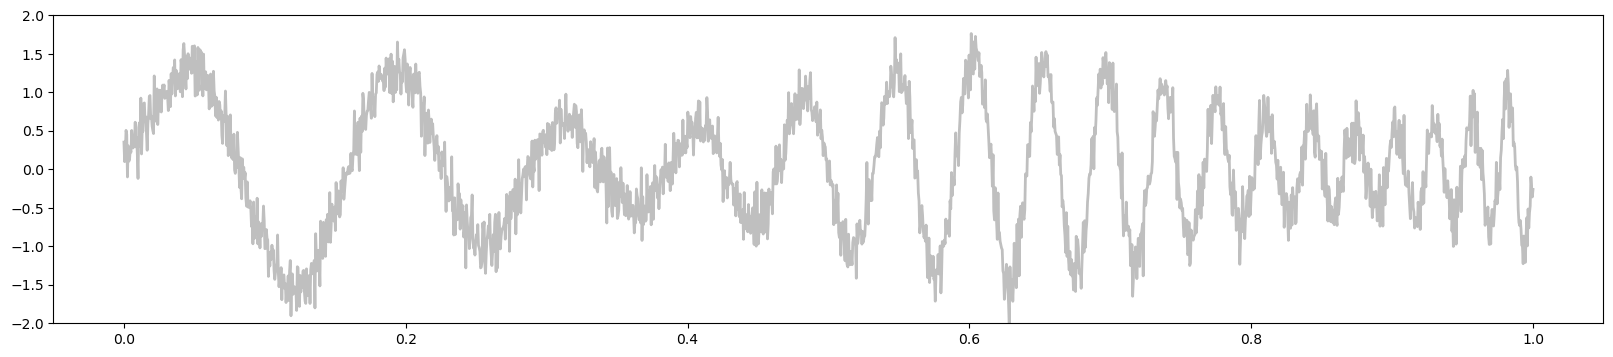

In [74]:
n_points = 2000          # number of grid points
eps = 1e-3               # avoid x = 0 (singularity of 1/x (where the x value starts)
noise = 0.2         # standard deviation of noise
h = 0.02                 # bandwidth in x for sliding window

# Reproducibility
np.random.seed(0)

# Create x-axis
x = np.linspace(0, 1, n_points)

# Noise term (increased to 0.2)
noise = noise * np.random.randn(len(x))

# Signal
y= (1 + 0.5 * np.sin(4 * np.pi * x)) * \
    np.sin(2 * np.pi * (6 * x + 12 * x**3)) + noise


# Plot
plt.figure(figsize=(20, 4))
plt.ylim(-2, 2)
plt.plot(x, y, color='gray', linewidth=2, alpha=0.5)
plt.show()

In [75]:
#defining median with min and max heapp function

import heapq

def running_median_heap(arr, k):
    """
    Compute running median using a heap-based method.
    arr : input array
    k   : window size
    returns median array of same length as arr
    """
    if k % 2 == 0:
        raise ValueError("Window size k should be odd for simplicity")
    
    medians = []
    low, high = [], []  # max-heap (low), min-heap (high)
    
    for i, num in enumerate(arr):
        # Add new number
        if not low or num <= -low[0]:
            heapq.heappush(low, -num)  # max-heap stored as negative
        else:
            heapq.heappush(high, num)
        
        # Balance heaps
        while len(low) > len(high) + 1:
            heapq.heappush(high, -heapq.heappop(low))
        while len(high) > len(low):
            heapq.heappush(low, -heapq.heappop(high))
        
        # Remove element outside window
        if i >= k:
            out = arr[i - k]
            if out <= -low[0]:
                low.remove(-out)
                heapq.heapify(low)
            else:
                high.remove(out)
                heapq.heapify(high)
            
            # Rebalance again after removal
            while len(low) > len(high) + 1:
                heapq.heappush(high, -heapq.heappop(low))
            while len(high) > len(low):
                heapq.heappush(low, -heapq.heappop(high))
        
        # Compute median
        if i >= k - 1:
            median = -low[0]  # median is top of max-heap
            medians.append(median)
    
    # Pad beginning to match original array length
    pad = [medians[0]]*(k//2)
    medians = pad + medians + pad
    return np.array(medians[:len(arr)])


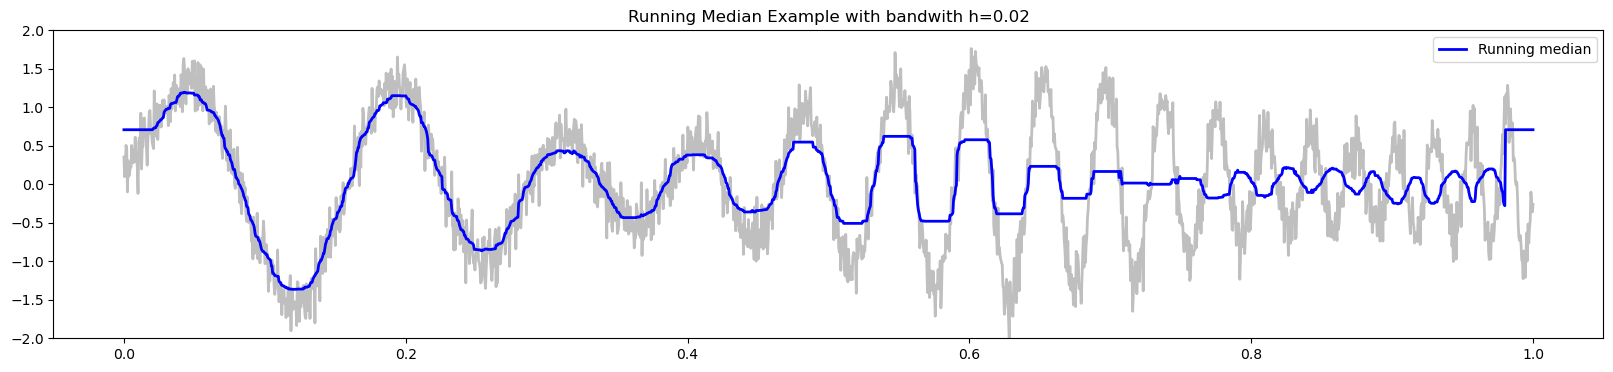

In [76]:
dx=x[1]-x[0]
no_of_spaces=np.round(h/dx) #h / dx computes how many steps of size dx fit into the window of size h
window_size=int(no_of_spaces)*2+1 # a trick to make the window simetrical
window_size = min(window_size, len(y))

# Running median with window size 7 and 11
median = s.rolling(window=window_size, center=True, min_periods=1).median()
median_heap=running_median_heap(s, window_size)
# Plot
plt.figure(figsize=(20, 4))
plt.plot(x, y, color='gray', linewidth=2, alpha=0.5)
plt.plot(x, median_heap,color='blue', linewidth=2, label='Running median')

plt.legend()
plt.ylim(-2, 2)
plt.title(f"Running Median Example with bandwith h={h}")
plt.show()

In [77]:
IMF1 = y - median_heap             # first IMF-like component
residual = median_heap                   # residual after removing IMF1

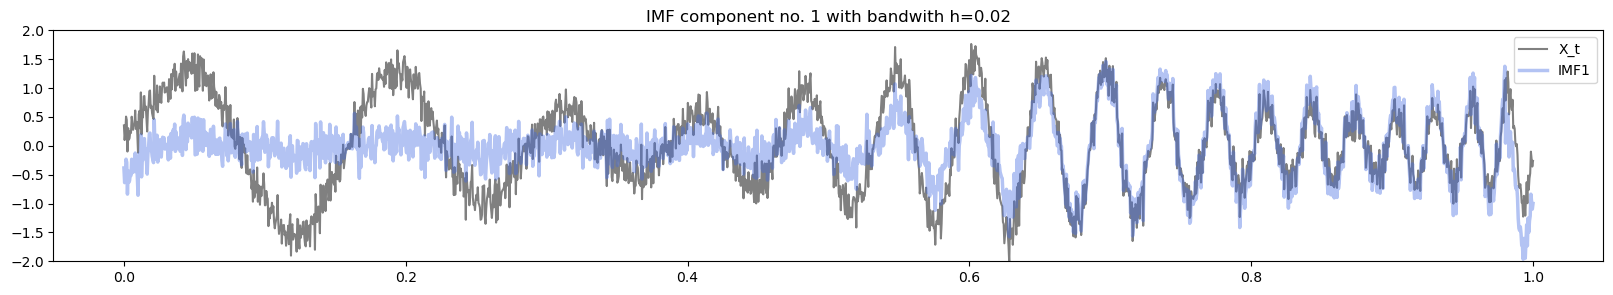

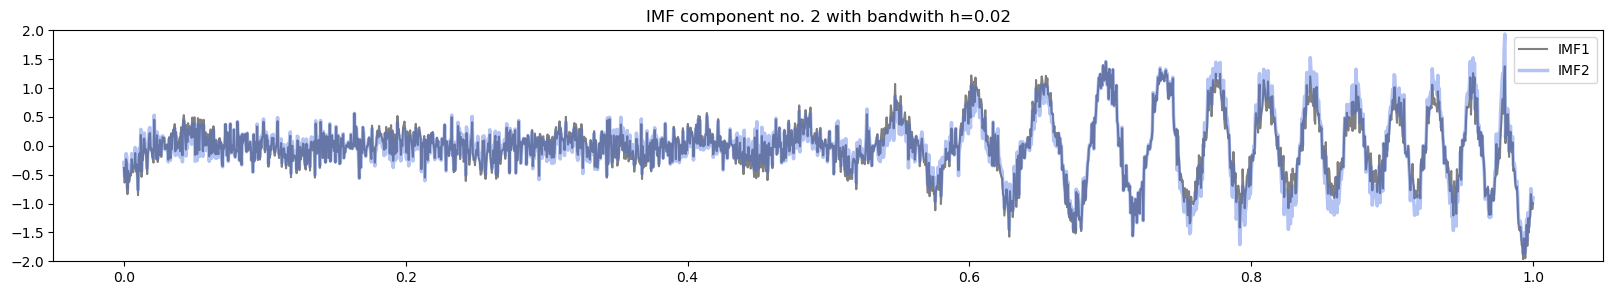

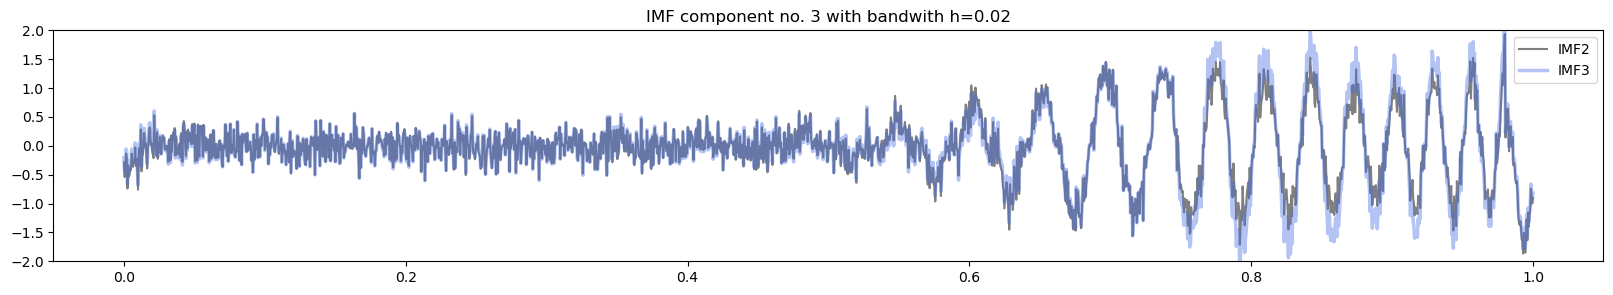

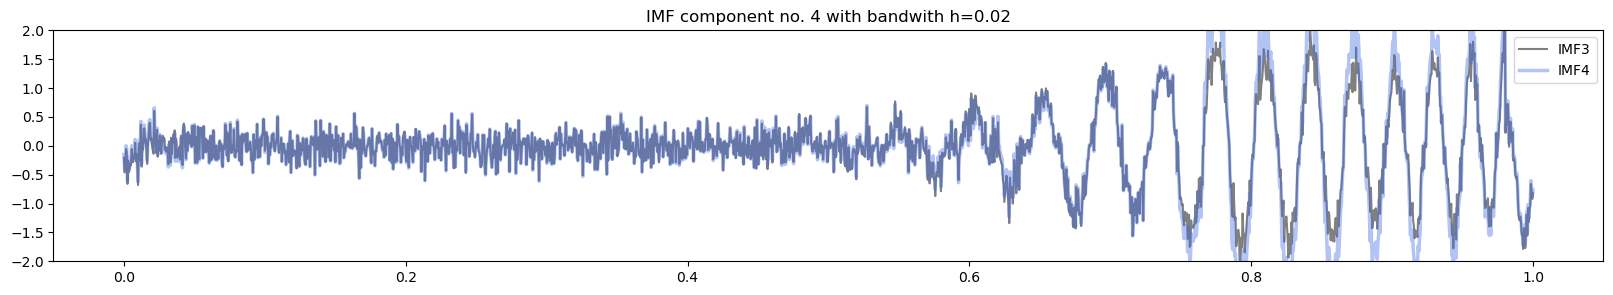

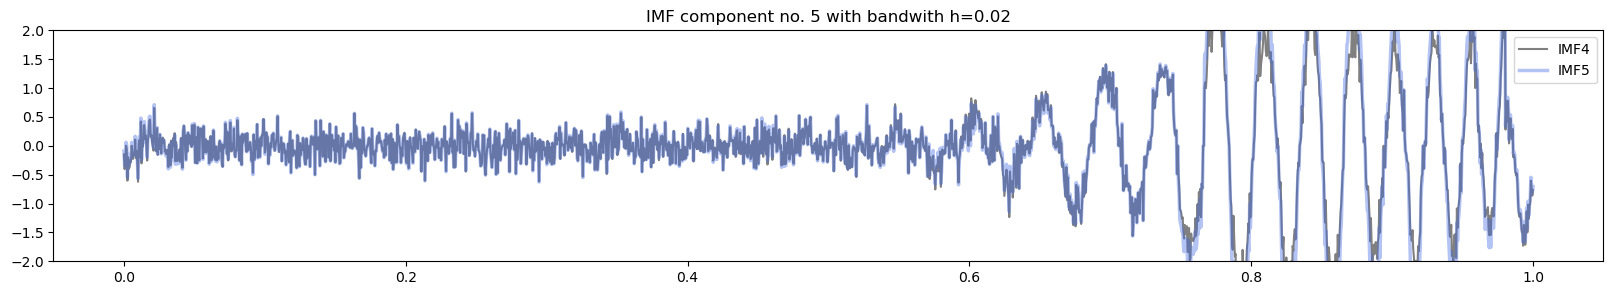

In [78]:
y_current = y.copy()

for k in range(1, 6):
    median_heap = running_median_heap(y_current, window_size)
    IMFk = y_current - median_heap
    residual = y_current-IMFk

    plt.figure(figsize=(20, 3))
    plt.ylim(-2, 2)
    plt.plot(x, y_current, color='gray', alpha=1, label="X_t" if k==1 else f"IMF{k-1}")
    plt.plot(x, IMFk, color='royalblue', linewidth=2.5, alpha=0.4, label=f'IMF{k}')

    plt.legend()
    
    #describing legend
    plt.title(f"IMF component no. {k} with bandwith h={h}")
    plt.savefig(f"EMD iter {k}.png",dpi=144, transparent=True)

  
    plt.show()

    


    y_current = IMFk.copy()



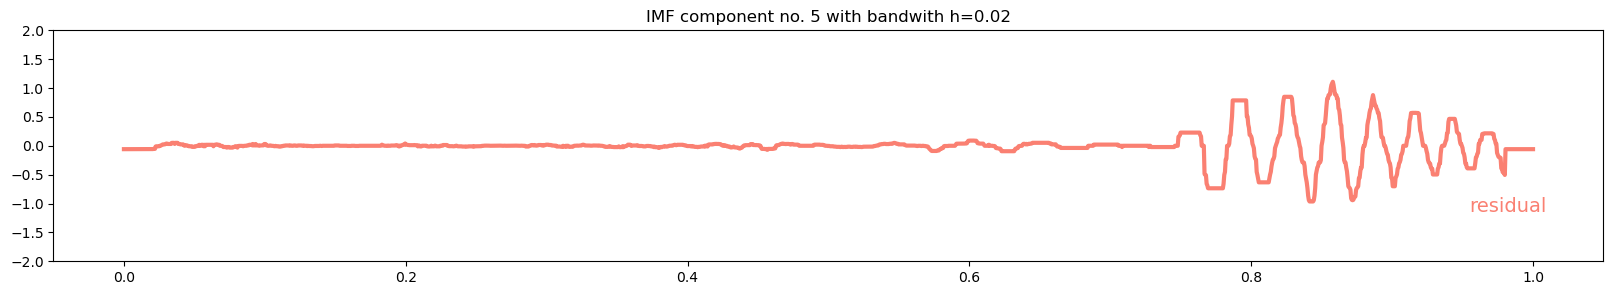

In [79]:
#plotting just the residual
plt.figure(figsize=(20,3))
plt.plot(x, residual, color='salmon', linewidth=3,label='residual')
plt.text(x[-1]+0.01, residual[-1]-1, 'residual', color='salmon', fontsize=14, va='center', ha='right',transform=plt.gca().transData )
plt.title(f"IMF component no. {k} with bandwith h={h}")
plt.ylim(-2,2)


plt.savefig(f"EMD residual",dpi=144, transparent=True)
plt.show()